# Récupération de données twitter:

In [1]:
# !wget http://artw.fr/etu/hetic/twitter-cdt18.json
#import requests
#url = "http://artw.fr/etu/hetic/twitter-cdt18.json"
#r = requests.get(url)

In [2]:
#open("twitter.json", "wb").write(r.content)

In [49]:
import json
import numpy as np

In [4]:
tweets = []
with open("twitter.json") as f:
    for l in f:
        tweets.append(json.loads(l.strip()))
print(f"Il y a {len(tweets)} tweets dans cette récolte")

Il y a 3215 tweets dans cette récolte


In [5]:
#!tail -n 100 twitter.json

In [6]:
import random

In [7]:
#?random.sample
random.sample(tweets,1)

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Sat Dec 15 15:48:23 +0000 2018',
  'display_text_range': [0, 140],
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [],
   'user_mentions': [{'id': 706136232661745664,
     'id_str': '706136232661745664',
     'indices': [3, 19],
     'name': 'Printemps social',
     'screen_name': 'PrintempsSocial'}]},
  'favorite_count': 0,
  'favorited': False,
  'full_text': 'RT @PrintempsSocial: Ils continuent d’utiliser le canon à eau et lacrymos pour disperser la foule toujours aussi déterminée à investir l’ho…',
  'geo': None,
  'id': 1073968017602764800,
  'id_str': '1073968017602764800',
  'in_reply_to_screen_name': None,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'is_quote_status': False,
  'lang': 'fr',
  'place': None,
  'retweet_count': 78,
  'retweeted': False,
  'retweeted_status': {'contributors': None,
   'coordinates

In [36]:
import datetime

In [9]:
#dt.datetime.strptime?

In [10]:
dt.datetime.strptime(datetime.datetime.strptime("Wed May 30 16:17:41 +0000 2018", "%a %b %d %H:%M:%S %z %Y").strftime("%Y-%m-%d"),"%Y-%m-%d")

datetime.datetime(2018, 5, 30, 0, 0)

In [12]:
#tweets[1]['created_at']

'Wed Jan 09 20:44:35 +0000 2019'

In [13]:
date_list = [datetime.datetime.strptime(\
            datetime.datetime.strptime(tweet['created_at'], \
                                 "%a %b %d %H:%M:%S %z %Y").\
                                  strftime("%Y-%m-%d"),"%Y-%m-%d") \
             for tweet in tweets]

In [16]:
date_list = sorted(date_list)

In [17]:
count_tweets = []
for d in set(date_list):
    count = 0
    for d_l in date_list:
        if d_l == d: count += 1
    count_tweets.append(count)

In [18]:
len(count_tweets)

208

In [19]:
tweets_usage = dict([i for i in zip(set(date_list), count_tweets)])

In [20]:
tweets_usage

{datetime.datetime(2018, 5, 28, 0, 0): 9,
 datetime.datetime(2018, 5, 29, 0, 0): 41,
 datetime.datetime(2018, 5, 30, 0, 0): 43,
 datetime.datetime(2018, 5, 31, 0, 0): 80,
 datetime.datetime(2018, 6, 1, 0, 0): 83,
 datetime.datetime(2018, 6, 2, 0, 0): 71,
 datetime.datetime(2018, 6, 3, 0, 0): 27,
 datetime.datetime(2018, 6, 4, 0, 0): 12,
 datetime.datetime(2018, 6, 5, 0, 0): 36,
 datetime.datetime(2018, 6, 6, 0, 0): 28,
 datetime.datetime(2018, 6, 7, 0, 0): 52,
 datetime.datetime(2018, 6, 8, 0, 0): 27,
 datetime.datetime(2018, 6, 9, 0, 0): 18,
 datetime.datetime(2018, 6, 10, 0, 0): 4,
 datetime.datetime(2018, 6, 11, 0, 0): 13,
 datetime.datetime(2018, 6, 12, 0, 0): 18,
 datetime.datetime(2018, 6, 13, 0, 0): 22,
 datetime.datetime(2018, 6, 14, 0, 0): 31,
 datetime.datetime(2018, 6, 15, 0, 0): 23,
 datetime.datetime(2018, 6, 16, 0, 0): 62,
 datetime.datetime(2018, 6, 17, 0, 0): 15,
 datetime.datetime(2018, 6, 18, 0, 0): 12,
 datetime.datetime(2018, 6, 19, 0, 0): 30,
 datetime.datetime(201

In [21]:
import matplotlib.pyplot as plt

In [22]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,8)

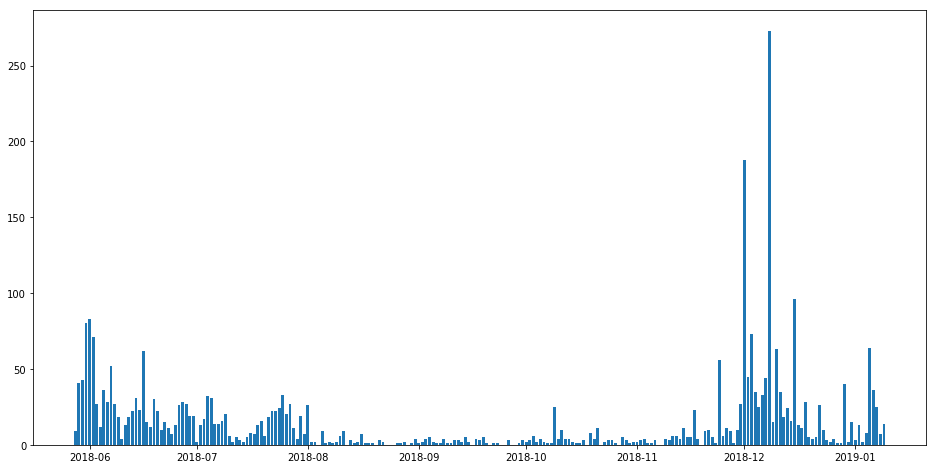

In [23]:
plt.bar(list(tweets_usage.keys()), list(tweets_usage.values()));

In [105]:
def moving_average(obj, n):
    ave = [np.mean([obj[j] for j in sorted(list(obj.keys()))[ix-n+1:ix+1]])\
                      if (ix >= n-1) else 0.0 for ix in range(0,len(obj))]
    return ave

In [106]:
ma = moving_average(tweets_usage, 3)

In [107]:
ma

[0.0,
 0.0,
 31.0,
 54.666666666666664,
 68.66666666666667,
 78.0,
 60.333333333333336,
 36.666666666666664,
 25.0,
 25.333333333333332,
 38.666666666666664,
 35.666666666666664,
 32.333333333333336,
 16.333333333333332,
 11.666666666666666,
 11.666666666666666,
 17.666666666666668,
 23.666666666666668,
 25.333333333333332,
 38.666666666666664,
 33.333333333333336,
 29.666666666666668,
 19.0,
 21.333333333333332,
 20.666666666666668,
 15.666666666666666,
 12.0,
 11.0,
 10.333333333333334,
 15.333333333333334,
 22.333333333333332,
 27.0,
 24.666666666666668,
 21.666666666666668,
 13.333333333333334,
 11.333333333333334,
 10.666666666666666,
 20.666666666666668,
 26.666666666666668,
 25.666666666666668,
 19.666666666666668,
 14.666666666666666,
 16.666666666666668,
 14.0,
 9.333333333333334,
 4.333333333333333,
 3.3333333333333335,
 3.3333333333333335,
 3.3333333333333335,
 5.0,
 6.666666666666667,
 9.333333333333334,
 12.0,
 11.666666666666666,
 13.333333333333334,
 15.333333333333334,


In [108]:
def plot_(obj, n):
    ave = moving_average(obj,n)
    ave = np.array(ave, dtype=float)
    fig, ax = plt.subplots(1,1)
    ax.bar(list(obj.keys()), list(obj.values()))
    ax.plot(sorted(list(tweets_usage.keys())),ave, "r")

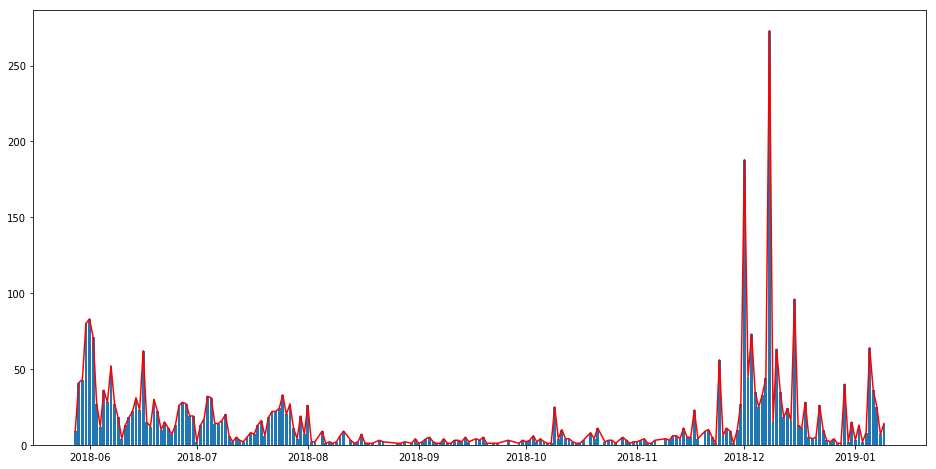

In [115]:
plot_(tweets_usage, 1)

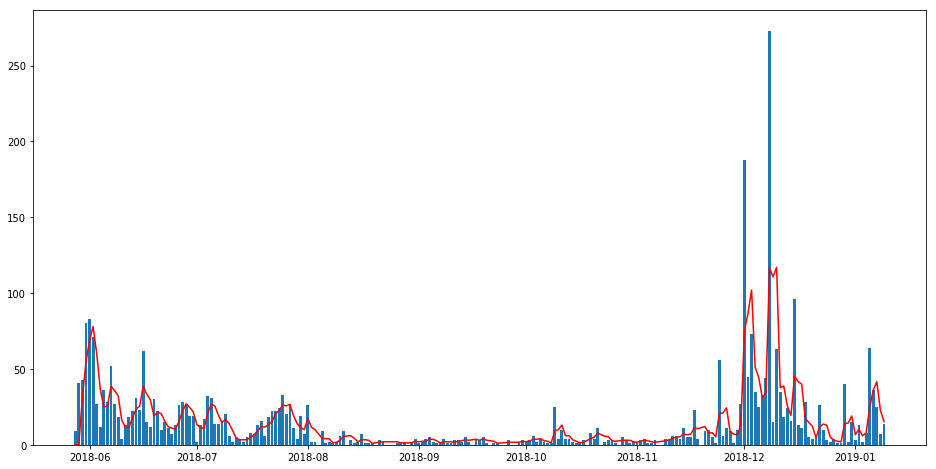

In [116]:
plot_(tweets_usage, 3)

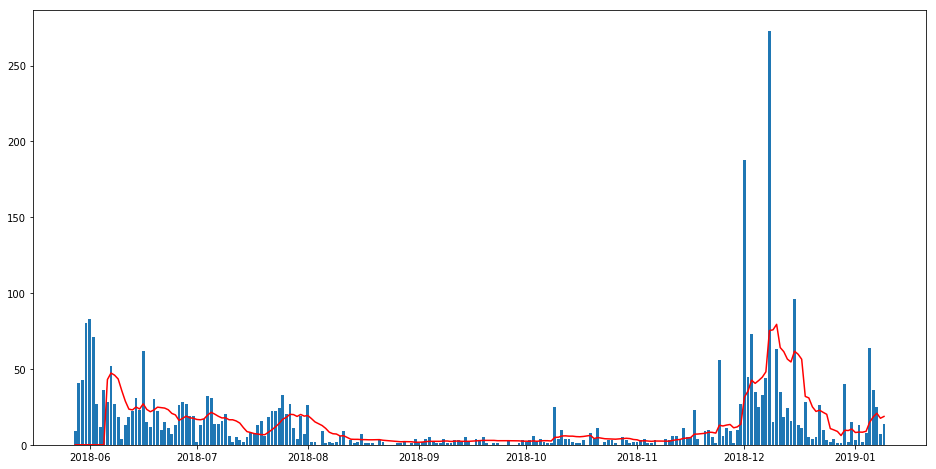

In [117]:
plot_(tweets_usage, 10)

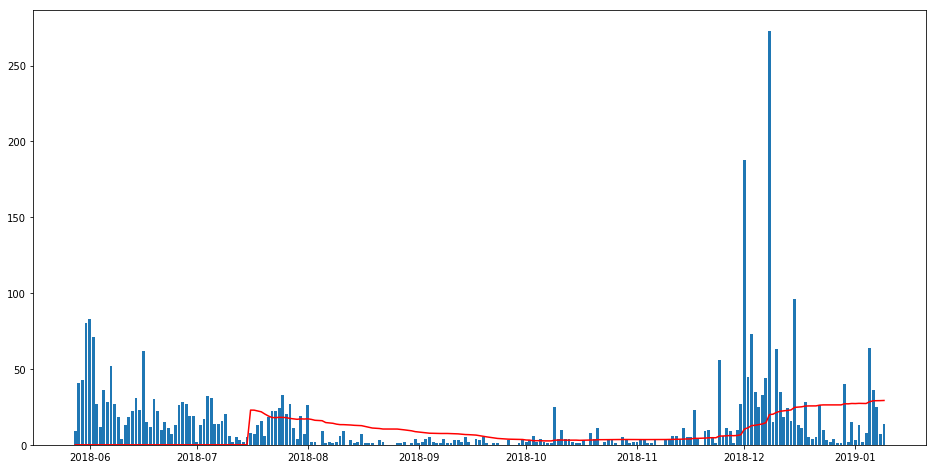

In [109]:
plot_(tweets_usage, 50)

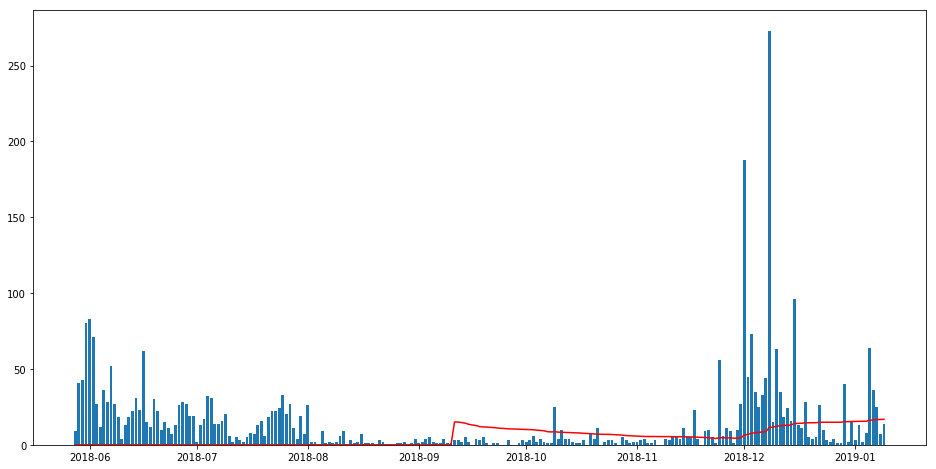

In [113]:
plot_(tweets_usage, 100)

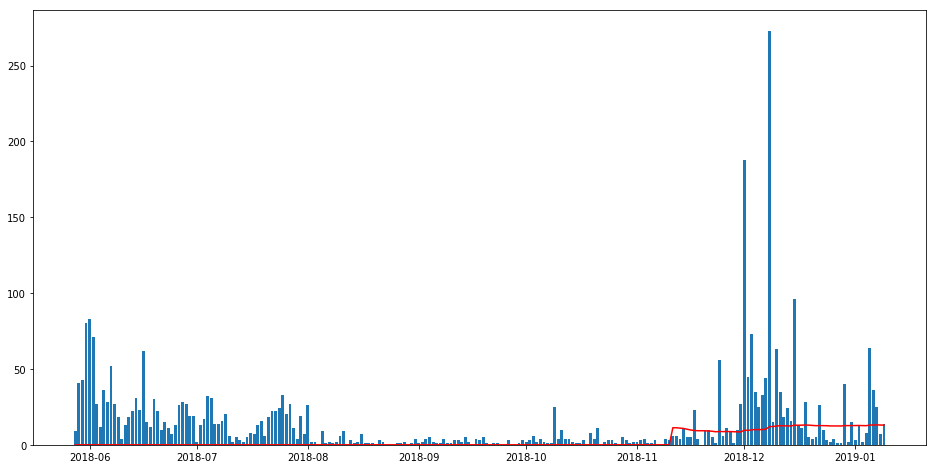

In [114]:
plot_(tweets_usage, 150)

In [118]:
def std_samples(obj,n):
    ma = moving_average(obj,n)
    return np.std(np.array(ma[n-1:]) - np.array(list(obj.values())[n-1:]))/np.sqrt(n)

In [119]:
error_echantillon = [std_samples(tweets_usage,i) for i in range(1,len(tweets_usage)+1)]

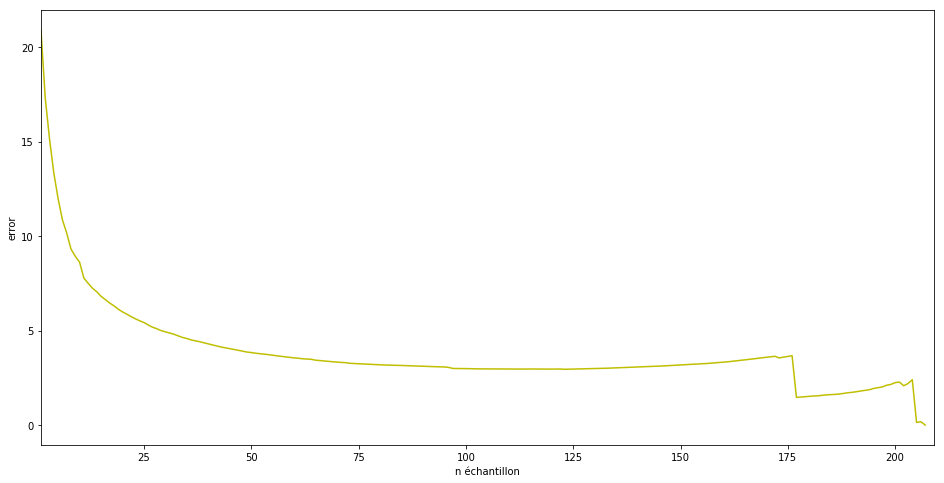

In [121]:
plt.plot(list(range(1,len(tweets_usage))), error_echantillon[1:],'y')
plt.xlim([1,len(tweets_usage)+1])
plt.xlabel("n échantillon")
plt.ylabel("error");

In [ ]:
# indicateur retard: lag
# moyenne mobilise: MA